In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
f_train = pd.read_excel("Data_Train.xlsx")
f_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
f_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
f_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [6]:
f_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [7]:
f_train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [8]:
f_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
f_train.dropna(inplace=True)

In [10]:
f_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
f_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [12]:
f_train['Duration'].max,f_train['Duration'].min

(<bound method NDFrame._add_numeric_operations.<locals>.max of 0        2h 50m
 1        7h 25m
 2           19h
 3        5h 25m
 4        4h 45m
           ...  
 10678    2h 30m
 10679    2h 35m
 10680        3h
 10681    2h 40m
 10682    8h 20m
 Name: Duration, Length: 10682, dtype: object>,
 <bound method NDFrame._add_numeric_operations.<locals>.min of 0        2h 50m
 1        7h 25m
 2           19h
 3        5h 25m
 4        4h 45m
           ...  
 10678    2h 30m
 10679    2h 35m
 10680        3h
 10681    2h 40m
 10682    8h 20m
 Name: Duration, Length: 10682, dtype: object>)

In [13]:
f_train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
f_train.describe(include="all")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4536,4536,2376,233,423,550,5625,8344,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.214567
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.548810
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [15]:
f_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [16]:
f_train['Date_of_Journey'] = pd.to_datetime(f_train['Date_of_Journey'])

In [17]:
f_train['month'] = f_train.Date_of_Journey.dt.month
f_train['year'] = f_train.Date_of_Journey.dt.year
f_train['day'] = f_train.Date_of_Journey.dt.day

In [18]:
f_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,year,day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,2019,24
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,2019,5
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,2019,6
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,2019,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,2019,3


In [19]:
f_train.drop(['Date_of_Journey'],axis=1,inplace=True)
f_train.drop(['year'],axis=1,inplace=True)

In [20]:
f_train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4,27
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4,27
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [21]:
f_train['Dep_Time'] = pd.to_datetime(f_train['Dep_Time'])

In [22]:
f_train['Dep_hour'] = f_train.Dep_Time.dt.hour
f_train['Dep_min'] = f_train.Dep_Time.dt.minute

In [23]:
f_train

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-09-15 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-09-15 05:50:00,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-09-15 09:25:00,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-09-15 18:05:00,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-09-15 16:50:00,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2022-09-15 19:55:00,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2022-09-15 20:45:00,23:20,2h 35m,non-stop,No info,4145,4,27,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2022-09-15 08:20:00,11:20,3h,non-stop,No info,7229,4,27,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2022-09-15 11:30:00,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [24]:
f_train.drop(['Dep_Time'],1,inplace=True)

In [25]:
f_train

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,4,27,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,4,27,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,11,30


In [26]:
f_train['Arrival_Time'] = pd.to_datetime(f_train['Arrival_Time'])

In [27]:
f_train['Arrival_hour'] = f_train.Arrival_Time.dt.hour
f_train['Arrival_min'] = f_train.Arrival_Time.dt.minute

In [28]:
f_train.drop(['Arrival_Time'],1,inplace=True)
f_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,4,27,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,4,27,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10


In [29]:
duration = list(f_train['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h " + duration[i]

In [30]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep ="h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [31]:
f_train['Duration_hours'] = duration_hours
f_train['Duration_mins'] = duration_mins

In [32]:
f_train

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [33]:
f_train.drop(['Duration'],1,inplace=True)
f_train

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,11,30,14,10,2,40


In [34]:
f_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

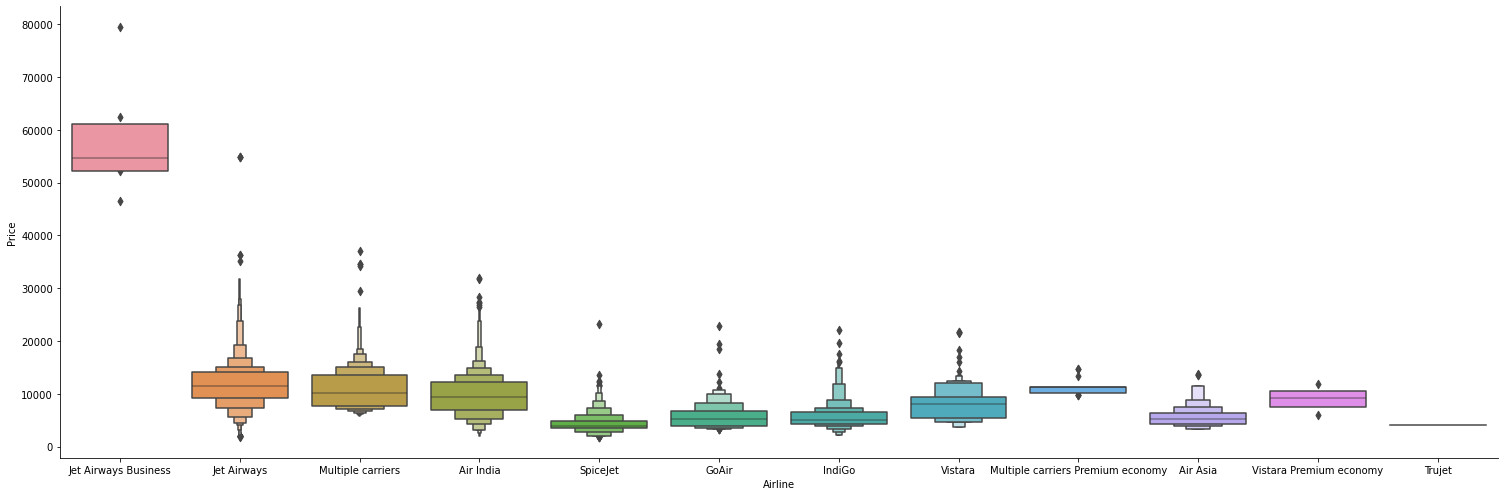

In [35]:
###  from grape we can see that Jet Airways Bussiness have the highest Price.
###  Apart from the first Airline almost all are having similar median

# Airline VS Price
sns.catplot(y='Price',x='Airline',data=f_train.sort_values("Price", ascending=False), kind="boxen",height= 7, aspect = 3)
plt.show()


In [36]:
f_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

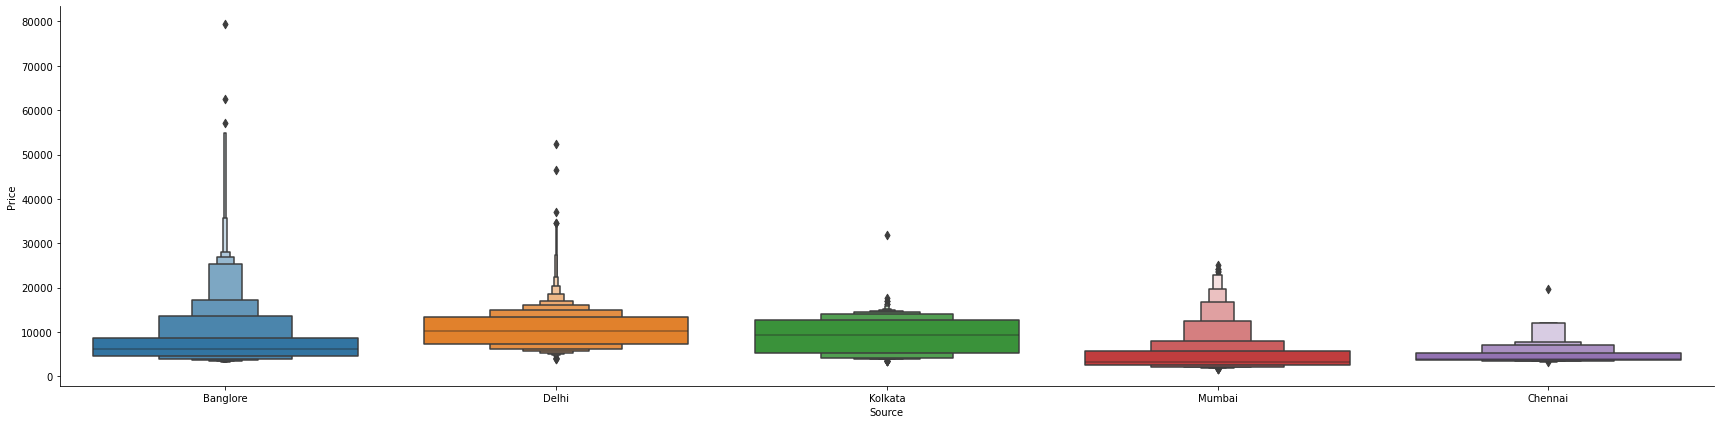

In [37]:
sns.catplot(x='Source',y='Price',data= f_train.sort_values("Price",ascending=False),kind = "boxen", height=6,aspect=4)
plt.show()

In [38]:
# additional info contains almost 80% no_info
# Route and Total_stops are related to each other

f_train.drop(['Route','Additional_Info'],1,inplace=True)

In [39]:
f_train

,Airline,Source,Destination,Total_Stops,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [40]:
f_train.corr()

,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Price,1.000000,0.010705,-0.165448,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855
month,0.010705,1.000000,-0.264896,0.028189,0.002136,-0.004329,-0.025786,0.055552,-0.018597
day,-0.165448,-0.264896,1.000000,-0.002301,-0.016433,-0.002176,-0.021423,-0.037964,-0.007708
Dep_hour,0.006799,0.028189,-0.002301,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707
Dep_min,-0.024458,0.002136,-0.016433,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485
Arrival_hour,0.024244,-0.004329,-0.002176,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309
Arrival_min,-0.086155,-0.025786,-0.021423,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628
Duration_hours,0.508778,0.055552,-0.037964,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468
Duration_mins,-0.124855,-0.018597,-0.007708,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000


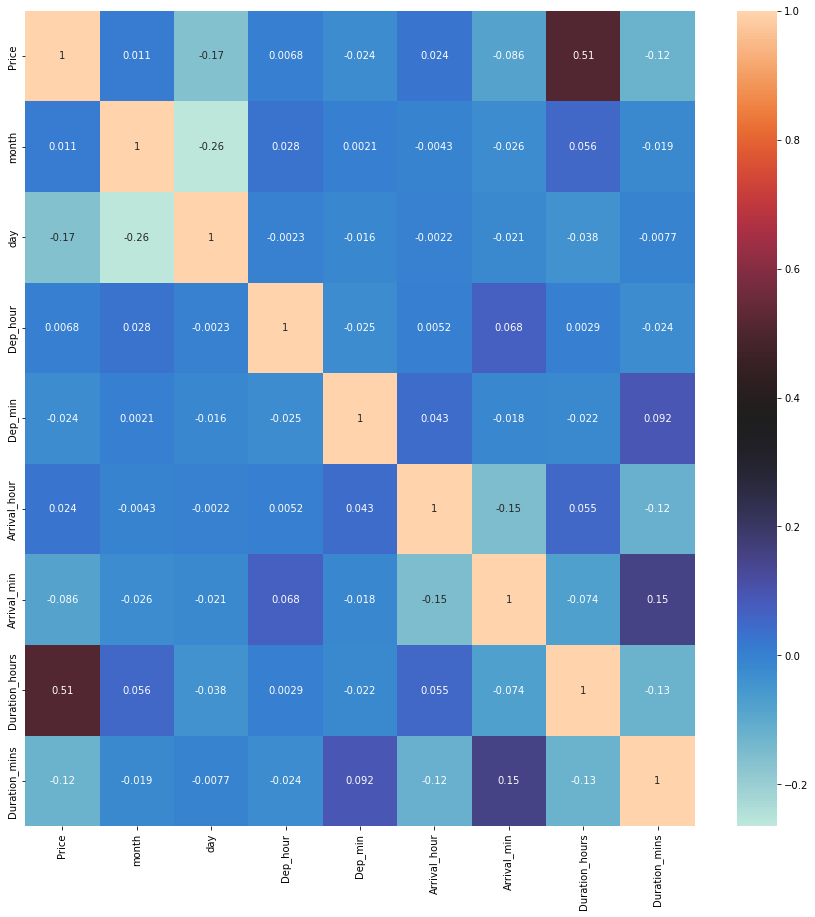

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(f_train.corr(),annot=True,cmap="icefire")
plt.show()

In [42]:
f_train

,Airline,Source,Destination,Total_Stops,Price,month,day,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [43]:
f_train.drop(['Dep_hour','Dep_min','Arrival_hour','Arrival_min','Duration_hours','Duration_mins'],axis=1,inplace=True)
f_train

,Airline,Source,Destination,Total_Stops,Price,month,day
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24
1,Air India,Kolkata,Banglore,2 stops,7662,1,5
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3
...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4
10679,Air India,Kolkata,Banglore,non-stop,4145,4,27
10680,Jet Airways,Banglore,Delhi,non-stop,7229,4,27
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3


 ----------------------------------------------------------------------------------------------------------

In [44]:
f_test = pd.read_excel("Test_set.xlsx")
f_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [45]:
f_test['Date_of_Journey'] = pd.to_datetime(f_test['Date_of_Journey'])

In [46]:
f_test['day'] = f_test.Date_of_Journey.dt.day
f_test['month'] = f_test.Date_of_Journey.dt.month
f_test['year'] = f_test.Date_of_Journey.dt.year

In [47]:
f_test.drop(['Date_of_Journey','year'],1,inplace=True)
f_test

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,3,6
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,3,6


In [48]:
f_test['Dep_Time'] = pd.to_datetime(f_test['Dep_Time'])
f_test['Dep_hour'] = f_test.Dep_Time.dt.hour
f_test['Dep_min'] = f_test.Dep_Time.dt.minute

In [49]:
f_test.drop(['Dep_Time'],1,inplace=True)
f_test

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,day,month,Dep_hour,Dep_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,5,12,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:25 07 Jun,23h 55m,1 stop,No info,6,6,20,30
2667,IndiGo,Kolkata,Banglore,CCU → BLR,16:55,2h 35m,non-stop,No info,27,3,14,20
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Mar,6h 35m,1 stop,No info,3,6,21,50
2669,Air India,Delhi,Cochin,DEL → BOM → COK,19:15,15h 15m,1 stop,No info,3,6,4,0


In [50]:
f_test['Arrival_Time'] = pd.to_datetime(f_test['Arrival_Time'])
f_test['Arrival_hour'] = f_test.Arrival_Time.dt.hour
f_test['Arrival_min'] = f_test.Arrival_Time.dt.minute

In [51]:
f_test.drop(['Arrival_Time'],1,inplace=True)
f_test

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,23h 55m,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,6h 35m,1 stop,No info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,15h 15m,1 stop,No info,3,6,4,0,19,15


In [52]:
duration = list(f_test['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip()+" 0m"
        else:
            duration[i] = "0h " + duration[i]

In [53]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep ="h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [54]:
f_test['Duration_hours'] = duration_hours
f_test['Duration_mins'] = duration_mins

In [55]:
f_test.drop(['Duration'],1,inplace=True)
f_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,3,6,4,0,19,15,15,15


In [56]:
f_test.drop(['Additional_Info','Route'],1,inplace=True)
f_test

,Airline,Source,Destination,Total_Stops,day,month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,Jet Airways,Delhi,Cochin,1 stop,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1 stop,5,12,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1 stop,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1 stop,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,non-stop,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,1 stop,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,non-stop,27,3,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,1 stop,3,6,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,1 stop,3,6,4,0,19,15,15,15


 ---------------------------------------------------------------------------------------------------------------

### Model


In [57]:
x = f_train.drop(['Price'],1)
y = f_train['Price']

In [58]:
x

,Airline,Source,Destination,Total_Stops,month,day
0,IndiGo,Banglore,New Delhi,non-stop,3,24
1,Air India,Kolkata,Banglore,2 stops,1,5
2,Jet Airways,Delhi,Cochin,2 stops,9,6
3,IndiGo,Kolkata,Banglore,1 stop,12,5
4,IndiGo,Banglore,New Delhi,1 stop,1,3
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,9,4
10679,Air India,Kolkata,Banglore,non-stop,4,27
10680,Jet Airways,Banglore,Delhi,non-stop,4,27
10681,Vistara,Banglore,New Delhi,non-stop,1,3


In [59]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

In [60]:
x.shape,y.shape

((10682, 6), (10682,))

In [61]:
from sklearn.preprocessing import OneHotEncoder

In [62]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

In [63]:
x.iloc[:,:4]

,Airline,Source,Destination,Total_Stops
0,IndiGo,Banglore,New Delhi,non-stop
1,Air India,Kolkata,Banglore,2 stops
2,Jet Airways,Delhi,Cochin,2 stops
3,IndiGo,Kolkata,Banglore,1 stop
4,IndiGo,Banglore,New Delhi,1 stop
...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop
10679,Air India,Kolkata,Banglore,non-stop
10680,Jet Airways,Banglore,Delhi,non-stop
10681,Vistara,Banglore,New Delhi,non-stop


In [64]:
x_dup = pd.DataFrame(ohe.fit_transform(x.iloc[:,:4]),columns=ohe.get_feature_names_out())
x_dup

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10679,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [65]:
x.drop(columns=['Airline','Source','Destination','Total_Stops'],axis=1,inplace=True)
x

,month,day
0,3,24
1,1,5
2,9,6
3,12,5
4,1,3
...,...,...
10678,9,4
10679,4,27
10680,4,27
10681,1,3


In [66]:
x.reset_index(inplace=True)
x_dup.reset_index(inplace=True)

In [67]:
x= pd.concat([x,x_dup],axis=1)
x.drop(['index'],axis=1,inplace=True)
x

,month,day,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3,24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,9,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,12,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,9,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10678,4,27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10679,4,27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10680,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [72]:
model.predict(x_test)

array([17835.065     ,  6930.04285714,  8644.69991379, ...,
        7135.63409524, 12463.75992564, 12196.75536811])

In [73]:
y_ped = model.predict(x_test)

In [74]:
model.score(x_train,y_train)

0.8240723359005897

In [75]:
model.score(x_test,y_test)

0.7994609582575396

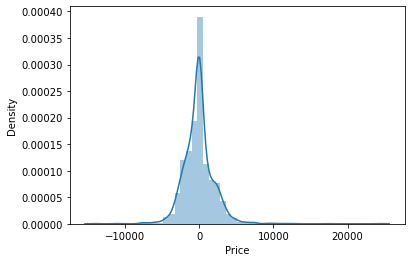

In [76]:
sns.distplot(y_test-y_ped)
plt.show()

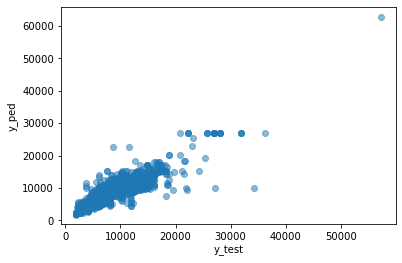

In [77]:
plt.scatter(y_test,y_ped ,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_ped")
plt.show()

In [78]:
from sklearn.metrics import mean_squared_error

In [79]:
mean_squared_error(y_test,y_ped)

4324034.113244363

In [80]:
from sklearn import metrics

In [81]:
print("MSE", metrics.mean_squared_error(y_test,y_ped))
print("MAE", metrics.mean_absolute_error(y_test,y_ped))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,y_ped)))

MSE 4324034.113244363
MAE 1385.0906930024732
RMSE 2079.4311994495906


In [82]:
metrics.r2_score(y_test,y_ped)

0.7994609582575396

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
param_grid={
        "n_estimators":[100,500],
        "max_features":['auto','sqrt'],
        "max_depth":[4,5,6,7,8],
         "criterion":['squared_error']   
}

In [85]:
grid_model = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [86]:
#grid_model.fit(x,y)

In [87]:
#grid_model.best_params_

In [88]:
random = RandomForestRegressor(criterion ='squared_error',max_depth = 8,max_features = 'auto',n_estimators = 500)
random.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, max_features='auto', n_estimators=500)

In [89]:
random.score(x_train,y_train)

0.7998815467010083

In [90]:
random.score(x_test,y_test)

0.7973216810638896

In [91]:
random.predict(x_test)

array([17028.35267178,  6675.19355798,  8719.08565449, ...,
        6678.9488159 , 12008.47079953, 11906.23655848])

In [92]:
y_pred= random.predict(x_test)

In [93]:
y_pred

array([17028.35267178,  6675.19355798,  8719.08565449, ...,
        6678.9488159 , 12008.47079953, 11906.23655848])

In [94]:
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("MAE", metrics.mean_absolute_error(y_test,y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE 4370161.32858684
MAE 1450.685987496101
RMSE 2090.4930826450586


In [95]:
metrics.r2_score(y_test,y_pred)

0.7973216810638896

In [96]:
import joblib

In [97]:
joblib.dump(ohe,"OneHotee.joblib")

['OneHotee.joblib']

In [98]:
joblib.dump(model,"model.pkl")

['model.pkl']

In [99]:
check = f_train.copy()
check.drop(['Price'],axis=1,inplace=True)
check

,Airline,Source,Destination,Total_Stops,month,day
0,IndiGo,Banglore,New Delhi,non-stop,3,24
1,Air India,Kolkata,Banglore,2 stops,1,5
2,Jet Airways,Delhi,Cochin,2 stops,9,6
3,IndiGo,Kolkata,Banglore,1 stop,12,5
4,IndiGo,Banglore,New Delhi,1 stop,1,3
...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,9,4
10679,Air India,Kolkata,Banglore,non-stop,4,27
10680,Jet Airways,Banglore,Delhi,non-stop,4,27
10681,Vistara,Banglore,New Delhi,non-stop,1,3


In [100]:
check = check.head(1)
check

,Airline,Source,Destination,Total_Stops,month,day
0,IndiGo,Banglore,New Delhi,non-stop,3,24


In [101]:
one_hot = joblib.load("OneHotee.joblib")

In [102]:
l1 = one_hot.transform(check.iloc[:,:4])
l1

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.]])

In [103]:
c = one_hot.get_feature_names_out()
c

array(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara',
       'Airline_Vistara Premium economy', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Total_Stops_1 stop', 'Total_Stops_2 stops', 'Total_Stops_3 stops',
       'Total_Stops_4 stops', 'Total_Stops_non-stop'], dtype=object)

In [104]:
total = pd.DataFrame(l1,columns=c)
total

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [105]:
l2 = check.iloc[:,4:]
l2

,month,day
0,3,24


In [106]:
final = pd.concat([l2,total],axis=1)
final

,month,day,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Total_Stops_1 stop,Total_Stops_2 stops,Total_Stops_3 stops,Total_Stops_4 stops,Total_Stops_non-stop
0,3,24,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [107]:
final_model = joblib.load("model.pkl")
final_model

RandomForestRegressor()

In [108]:
final_model.predict(final) 

array([6146.26857402])